- **Importação das bibliotecas necessárias para formular o modelo de aprendizado**

In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
import os

from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from keras.models import load_model
from keras import optimizers
from keras import datasets
from keras import layers

dir = '/mnist_model/'
if not os.path.exists(dir):
  os.mkdir(dir)

- **Hiperparâmetros**

In [13]:
# Otimizador ('SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl') e perdas
opt = 'Adam'
lss = 'categorical_crossentropy'

# Funções de ativação ('relu', 'sigmoid', 'softplus', 'softsign', 'softmax', 'tanh', 'selu', 'elu', 'exponential')
actv_funct = 'relu'
exit_actv_funct = 'softmax'

# Tamanho dos batchs e número de épocas de treinamento
b_size = 60
n_epochs = 4

- **Pré-Processamento**

In [3]:
# Número de classes (Dígitos de 0 a 9)
n_classes = 10

# Divisão da base de dados em conjunto de teste e treinamento
(raw_training_attributes, raw_training_classes), (raw_test_attributes, raw_test_classes) = datasets.mnist.load_data()

# Discretiza os valores da classe
training_classes = keras.utils.to_categorical(raw_training_classes, n_classes)
test_classes = keras.utils.to_categorical(raw_test_classes, n_classes)

# Converte uma imagem (matriz) de resolução 28 x 28 para um vetor de tamanho 784 normaliza os valores de pixel (atributos)
training_attr = raw_training_attributes.reshape(60000, 784)
test_attr = raw_test_attributes.reshape(10000, 784)

training_attributes = training_attr.astype('float32')/255
test_attributes = test_attr.astype('float32')/255

11501568/11490434 [==============================] - 0s 0us/step


- **Plots das imagens da base de dados**

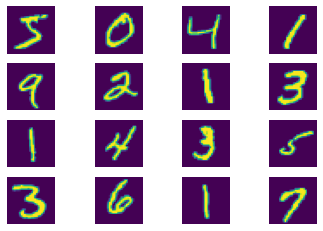

In [ ]:
size = 16
sqrt_size = math.sqrt(size)

plt.figure()

for i in range(size):
  plt.subplot(sqrt_size, sqrt_size, i + 1)
  plt.imshow(raw_training_attributes[i])
  plt.axis('off')

plt.show()

- **DNN - Rede Neural Artificial Profunda**

In [4]:
# Definição da estrutura da rede neural (nº de camadas, nós, ativação...)
model = keras.Sequential([
                          layers.Dense(512, activation=actv_funct, input_dim=training_attributes.shape[1]),
                          layers.Dense(256, activation=actv_funct),
                          layers.Dense(124, activation=actv_funct),
                          layers.Dense(n_classes, activation=exit_actv_funct)
])

# Sumário da rede neural e treinamento da mesma
model.summary()
model.compile(loss=lss, optimizer=opt, metrics=['accuracy'])
model.fit(training_attributes, training_classes, batch_size=b_size, epochs=n_epochs, verbose=1)

# Desempenho do modelo
results = model.evaluate(test_attributes, test_classes, verbose=0)
print('\nPerda:    ' + str(round(results[0] * 100, 2)) + '%')
print('Acurácia: ' + str(round(results[1] * 100, 2)) + '%')

# Salvamento do modelo
model.save(os.getcwd() + dir + 'DNN_' + str(n_epochs) + '_' + str(b_size) + '_' + str(actv_funct) + '_' + 
                                 str(exit_actv_funct) + '_' + str(opt) + '_' + str(lss) + '.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
1000/1000 [==============================] - 16s 15ms/step - loss: 0.2007 - accuracy: 0.9394
Epoch 2/4
1000/1000 [==============================] - 10s 10ms/step - loss: 0.

- **CNN - Rede Neural Artificial Convolucional**

In [14]:
model = keras.Sequential()

# Primeira camada convolucional
model.add(layers.Conv2D(filters=32, kernel_size=5, strides=(1, 1), padding='same', activation=actv_funct, input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Segunda camada convolucional
model.add(layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same', activation=actv_funct))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Camada de 'Dropout' que 'reseta' dados da entrada aleatoriamente a cada n passos de treinamento, com o intuito de reduzir overfitting 
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())

# Duas camadas inteiramente conectadas 
model.add(layers.Dense(128, activation=actv_funct))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation=tf.nn.softmax))

# Redimensionamento dos dados, adaptando para utilização da CNN
cnn_training_attributes = training_attributes.reshape(60000, 28, 28, 1)
cnn_test_attributes = test_attributes.reshape(10000, 28, 28, 1)

# Treinamento da rede neural
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])
model.fit(cnn_training_attributes, training_classes, epochs=n_epochs, batch_size=b_size)

# Desempenho do modelo
results = model.evaluate(cnn_test_attributes, test_classes, verbose=0)
print('\nPerda:    ' + str(round(results[0] * 100, 2)) + '%')
print('Acurácia: ' + str(round(results[1] * 100, 2)) + '%')

model.save(os.getcwd() + dir + 'CNN_' + str(n_epochs) + '_' + str(b_size) + str(actv_funct) + '_' + 
                                 str(exit_actv_funct) + '_' + str(opt) + '_' + str(lss) + '.h5')

Epoch 1/4
1000/1000 [==============================] - 109s 109ms/step - loss: 0.2379 - accuracy: 0.9281
Epoch 2/4
1000/1000 [==============================] - 108s 108ms/step - loss: 0.0884 - accuracy: 0.9735
Epoch 3/4
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0675 - accuracy: 0.9797
Epoch 4/4
1000/1000 [==============================] - 110s 110ms/step - loss: 0.0584 - accuracy: 0.9829

Perda:    3.04%
Acurácia: 99.08%


- **Carregamento de modelos**

In [16]:
name = os.getcwd() + dir + 'CNN_4_60relu_softmax_Adam_categorical_crossentropy.h5'

loaded_model = load_model(name)
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

- **Visualização das predições**

Predições para as primeiras 25 imagens:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
9,6,6,5,4,	

Primeiras 25 imagens do conjunto de teste:


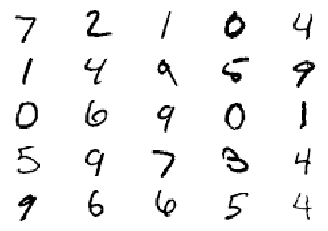

In [9]:
n = 25

final = np.argmax(loaded_model.predict(cnn_test_attributes[0 : n]), axis=-1)

fig, ax = plt.subplots(nrows=int(n / 5), ncols=5)
ax = ax.flatten()

print('Predições para as primeiras {} imagens:'.format(n))

for i in range(n):
  print(final[i],end=',')

  if int((i + 1) % 5) == 0:
    print('\t')
  
  img = cnn_test_attributes[i].reshape((28, 28))
  plt.axis("off")

  ax[i].imshow(img, cmap='Greys', interpolation='nearest')
  ax[i].axis("off")

print('\nPrimeiras {} imagens do conjunto de teste:'.format(n))

- **Matriz de confusão**

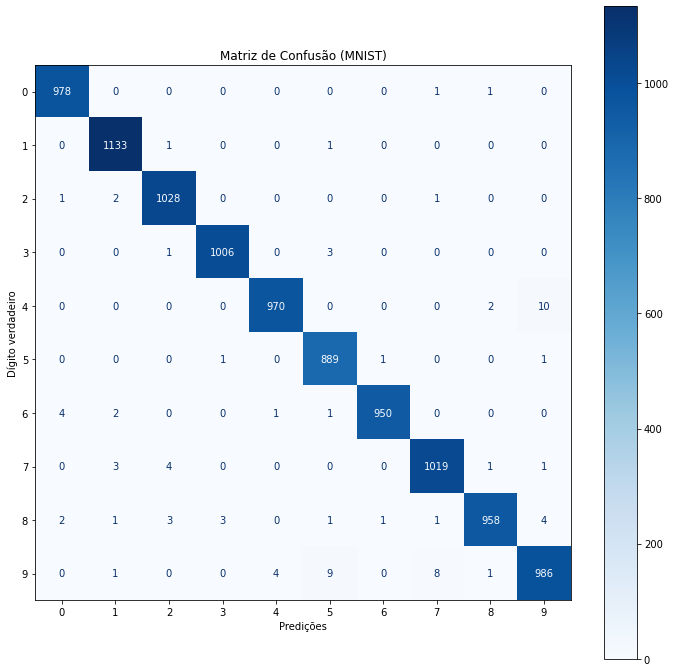

In [24]:
# Executa as predições
final = np.argmax(loaded_model.predict(cnn_test_attributes), axis=-1)

# Formata os dados dos rótulos reais para comparar com as predições
cnn_test_classes = list()
for i in range(len(test_classes)):
  cnn_test_classes.append(np.argmax(test_classes[i]))

# Nome das classes (Dígitos de 0 a 9)
class_names = [str(i) for i in range(n_classes)]

# Plot da matriz de confusão
fig_size = (12, 12)
ConfusionMatrixDisplay.from_predictions(cnn_test_classes, final, display_labels=class_names, cmap='Blues', ax=plt.subplots(figsize=fig_size)[1])
plt.title('Matriz de Confusão (MNIST)')
plt.xlabel('Predições')
plt.ylabel('Dígito verdadeiro')
plt.show()